# Oscilaciones en sistemas mecánicos

La siguiente función representa una solución en el punto ti y su relación con el sistema plano asociado.

In [1]:
def muelle(ti,u,X):
    v = u.diff()
    xt = u(ti)
    yt = v(ti)
    dibujo = point((xt,-2),axes=false,size=50,color='red') + point(([2,2],[-2,-3]),size=0)
    dibujo += line([(-2,-2)] + [(-2+k*(xt+2)/10,-2+(-1)^k/10) for k in [1 .. 9]] + [(xt,-2)])
    dibujo += plot_vector_field(X(x,y),(x,-1.5,1.5),(y,-1.5,1.5))
    dibujo += parametric_plot((u(t),v(t)),(t,-0.2,4*pi+0.2),color=[0.8,0.8,0.8])
    dibujo += point((xt,yt),axes=false,size=50,color='green')
    dibujo += line([ (xt,yt) , (xt,-2) ],color='gray',linestyle='--')
    return dibujo

## Sin rozamiento ni forzamiento externo

In [2]:
# Definimos el campo
X(x,y) = [y, -x ]

In [3]:
# Calculamos los autovalores
solve(x^2+1,x)

[x == -I, x == I]

In [4]:
# Y la solución
u(t) = cos(t)

In [5]:
# Comprobamos que es solución
u.diff(2)(t) - X(u(t),u.diff()(t))[1]

0

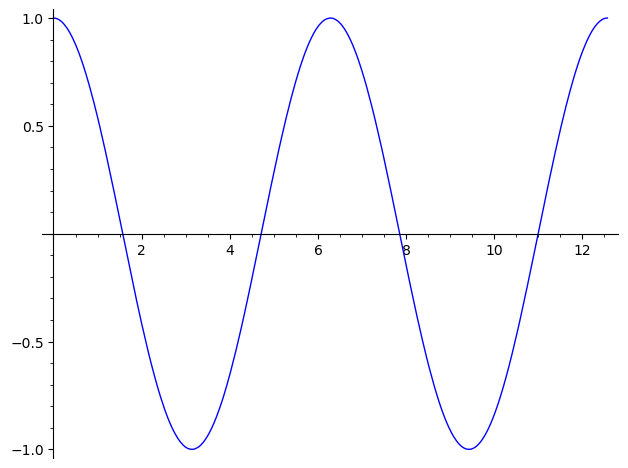

In [6]:
# Dibujamos la gráfica de la solución
plot(u(t),(t,0,4*pi))

In [7]:
animacion = animate([muelle(ti,u,X) for ti in [0, 0.1 .. 4*pi]])

Animation with 126 frames
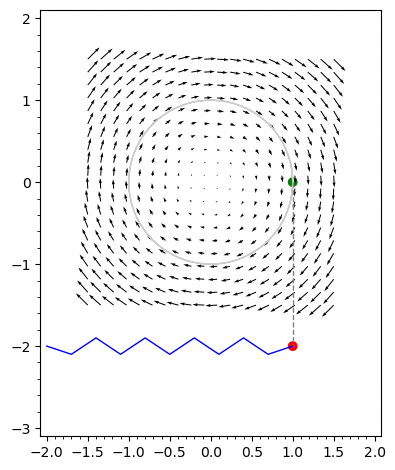

In [8]:
animacion.show()

## Movimiento amortiguado

In [9]:
# Definimos el campo
X(x,y) = [y, -x - y/5 ]

In [10]:
# Calculamos los autovalores
solve(x^2+x/5+1,x)

[x == -3/10*I*sqrt(11) - 1/10, x == 3/10*I*sqrt(11) - 1/10]

In [11]:
# Y la solución
u(t) = cos( ( 3/10*sqrt(11) ) * t)*exp(-t/10)

In [12]:
# Comprobamos que es solución
u.diff(2)(t) - X(u(t),u.diff()(t))[1]

0

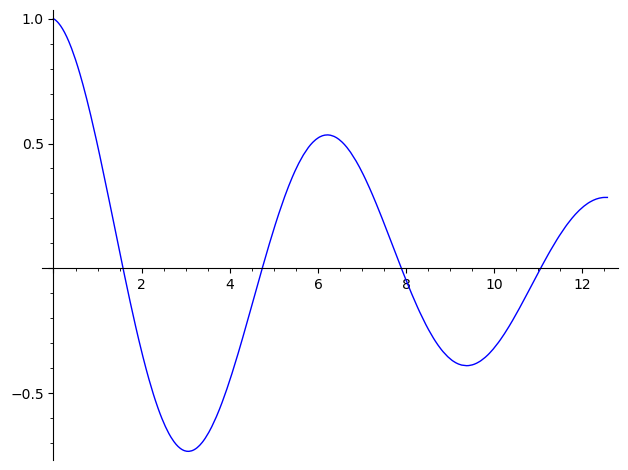

In [13]:
# Dibujamos la gráfica de la solución
plot(u(t),(t,0,4*pi))

In [14]:
animacion = animate([muelle(ti,u,X) for ti in [0, 0.1 .. 4*pi]])

Animation with 126 frames
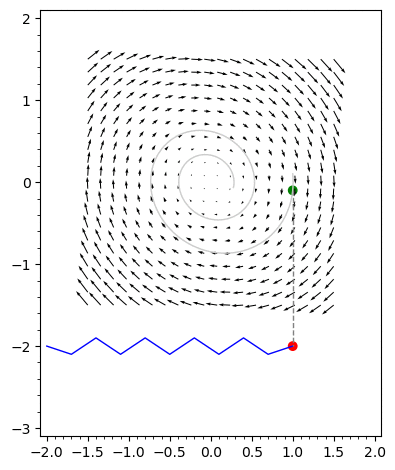

In [15]:
animacion.show()

## Movimiento periódicamente forzado

In [8]:
# Definimos el campo
X(x,y,t) = [y, -x + cos(t)/10 ]
X0(x,y) = [y, -x ] # Campo autónomo (no podemos dibujar el no-autónomo en 2D)

In [9]:
# Matriz fundamental
Phi = matrix([[sin(t),cos(t)],[cos(t),-sin(t)]])
show(Phi)

[ sin(t)  cos(t)]
[ cos(t) -sin(t)]

In [10]:
# Inversa
Phi_inversa = matrix([[sin(t),cos(t)],[cos(t),-sin(t)]])
Phi*Phi_inversa

[cos(t)^2 + sin(t)^2                   0]
[                  0 cos(t)^2 + sin(t)^2]

In [11]:
Phi_inversa * vector([0,cos(t)/10])

(1/10*cos(t)^2, -1/10*cos(t)*sin(t))

In [12]:
(Phi_inversa * vector([0,cos(t)/10])).integrate(t)

(1/20*t + 1/40*sin(2*t), 1/20*cos(t)^2)

In [13]:
# Definimos la solución particular
u(t) = ( Phi*(Phi_inversa * vector([0,cos(t)/10])).integrate(t) )[0]
u(t).simplify_full()

1/20*t*sin(t) + 1/20*cos(t)

In [14]:
# Comprobamos que es solución
(u.diff(2)(t) + u(t) - cos(t)/10).full_simplify()

0

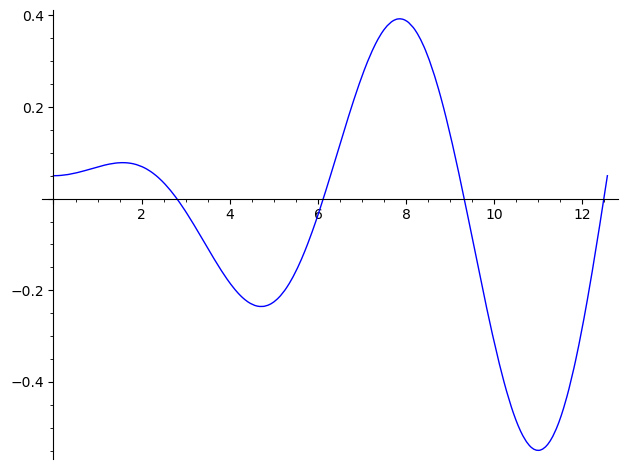

In [15]:
# Dibujamos la gráfica de la solución
plot(u(t),(t,0,4*pi))

In [19]:
animacion = animate([muelle(ti,u,X0) for ti in [0, 0.4 .. 12*pi]])

Animation with 95 frames
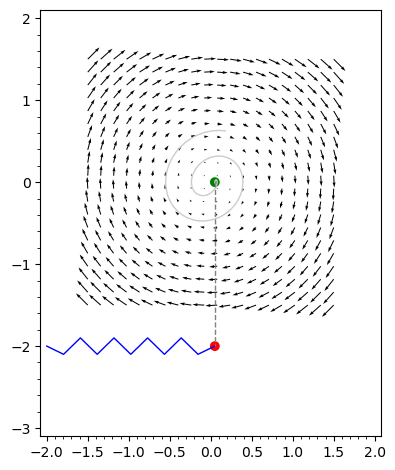

In [20]:
animacion.show()

In [22]:
sin(2*t).trig_expand()

2*cos(t)*sin(t)